In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ Libraries loaded successfully")

✓ Libraries loaded successfully


In [3]:
# Load Excel file
file_path = 'Qral Pinethase Sales Launch Strategy Data Set 2025.xlsx'

# Check sheet names
xls = pd.ExcelFile(file_path)
print(f"Sheet names: {xls.sheet_names}")
print(f"Number of sheets: {len(xls.sheet_names)}")

# Load the HCP List sheet
df = pd.read_excel(file_path, sheet_name='HCP List')

print(f"\n✓ Loaded data: {len(df):,} rows, {len(df.columns)} columns")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\nFirst few rows:")
df.head()


Sheet names: ['HCP List']
Number of sheets: 1

✓ Loaded data: 3,990 rows, 13 columns

Column names:
   1. NPI
   2. First Name
   3. Last Name
   4. Primary Spec
   5. Med School
   6. Graduation Year
   7. Medical Credential
   8. Organization ID
   9. Organization Name
  10. Organization City
  11. Organization State
  12. Competitor Vials Prescribed Per Year
  13. Pancreatic Cancer Patients Treated Per Year

First few rows:


,NPI,First Name,Last Name,Primary Spec,Med School,Graduation Year,Medical Credential,Organization ID,Organization Name,Organization City,Organization State,Competitor Vials Prescribed Per Year,Pancreatic Cancer Patients Treated Per Year
0,1003991035,FRANK,FOSSELLA,MEDICAL ONCOLOGY,OTHER,1982.0,NaN,7.911801e+09,PHYSICIANS REFERRAL SERVICE,HOUSTON,TX,360,10
1,1073698767,ELIZABETH,POPLIN,MEDICAL ONCOLOGY,UNIVERSITY OF MASSACHUSETTS MEDICAL SCHOOL,1976.0,MD,NaN,NaN,NaN,NJ,360,10
2,1235106923,PAUL,ENGSTROM,MEDICAL ONCOLOGY,UNIVERSITY OF MINNESOTA MEDICAL SCHOOL,1962.0,MD,8.123290e+09,"FOX CHASE CANCER CENTER MEDICAL GROUP, INC",PHILADELPHIA,PA,360,10
3,1265478325,KARL,SCHULTHEISS,MEDICAL ONCOLOGY,OTHER,1986.0,NaN,3.476462e+09,SAINT ALPHONSUS REGIONAL MEDICAL CENTER INC,NaN,ID,360,10
4,1437156197,CHARLES,MONTGOMERY,MEDICAL ONCOLOGY,UNIVERSITY OF MISSISSIPPI SCHOOL OF MEDICINE,1974.0,MD,NaN,NaN,NaN,MS,360,10


In [11]:
# Quick summary: unique values for each column
df.nunique().sort_values(ascending=False)


NPI                                            3990
Last Name                                      3235
First Name                                     1836
Organization ID                                 677
Organization Name                               634
Organization City                               506
Competitor Vials Prescribed Per Year            166
Med School                                      161
Graduation Year                                  62
Organization State                               54
Pancreatic Cancer Patients Treated Per Year      10
Medical Credential                                3
Primary Spec                                      2
dtype: int64

In [ ]:
# Print all unique values of Primary Spec
primary_specs = df['Primary Spec'].unique()
for i, spec in enumerate(sorted(primary_specs), 1):
    print(f"  {i}. {spec}")

  1. MEDICAL ONCOLOGY
  2. RADIATION ONCOLOGY


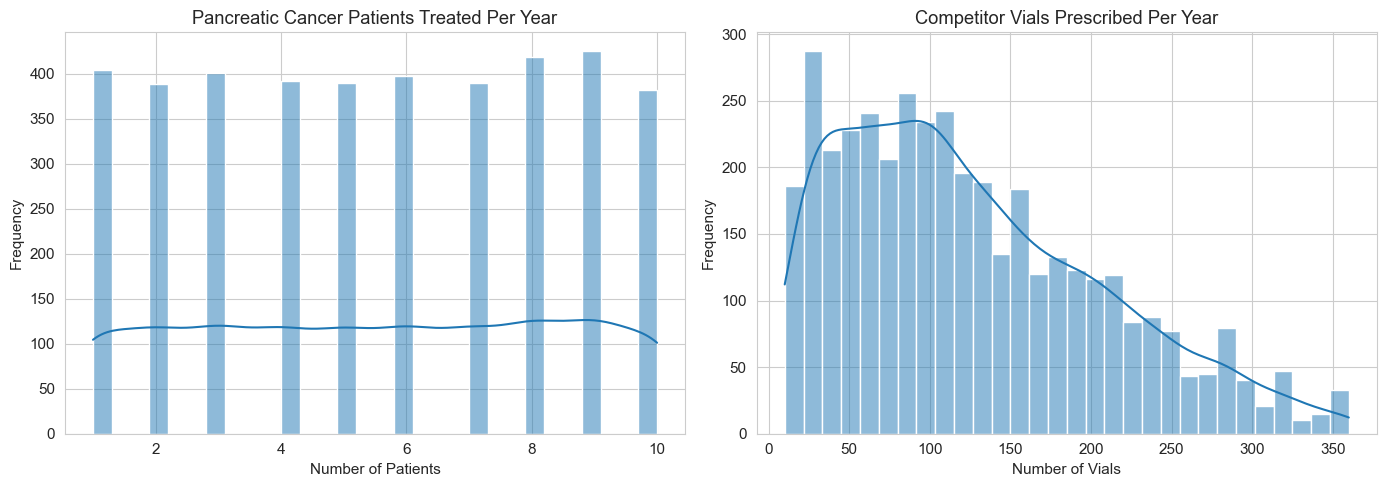


Summary Statistics:
       Pancreatic Cancer Patients Treated Per Year  \
count                                  3990.000000   
mean                                      5.518296   
std                                       2.874851   
min                                       1.000000   
25%                                       3.000000   
50%                                       6.000000   
75%                                       8.000000   
max                                      10.000000   

       Competitor Vials Prescribed Per Year  
count                           3990.000000  
mean                             126.023308  
std                               81.203212  
min                               10.000000  
25%                               60.000000  
50%                              108.000000  
75%                              180.000000  
max                              360.000000  


In [12]:
# Histograms using seaborn for better visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=df, x='Pancreatic Cancer Patients Treated Per Year', bins=30, ax=axes[0], kde=True)
axes[0].set_title('Pancreatic Cancer Patients Treated Per Year')
axes[0].set_xlabel('Number of Patients')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df, x='Competitor Vials Prescribed Per Year', bins=30, ax=axes[1], kde=True)
axes[1].set_title('Competitor Vials Prescribed Per Year')
axes[1].set_xlabel('Number of Vials')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check for outliers/summary stats
print("\nSummary Statistics:")
print(df[['Pancreatic Cancer Patients Treated Per Year', 'Competitor Vials Prescribed Per Year']].describe())


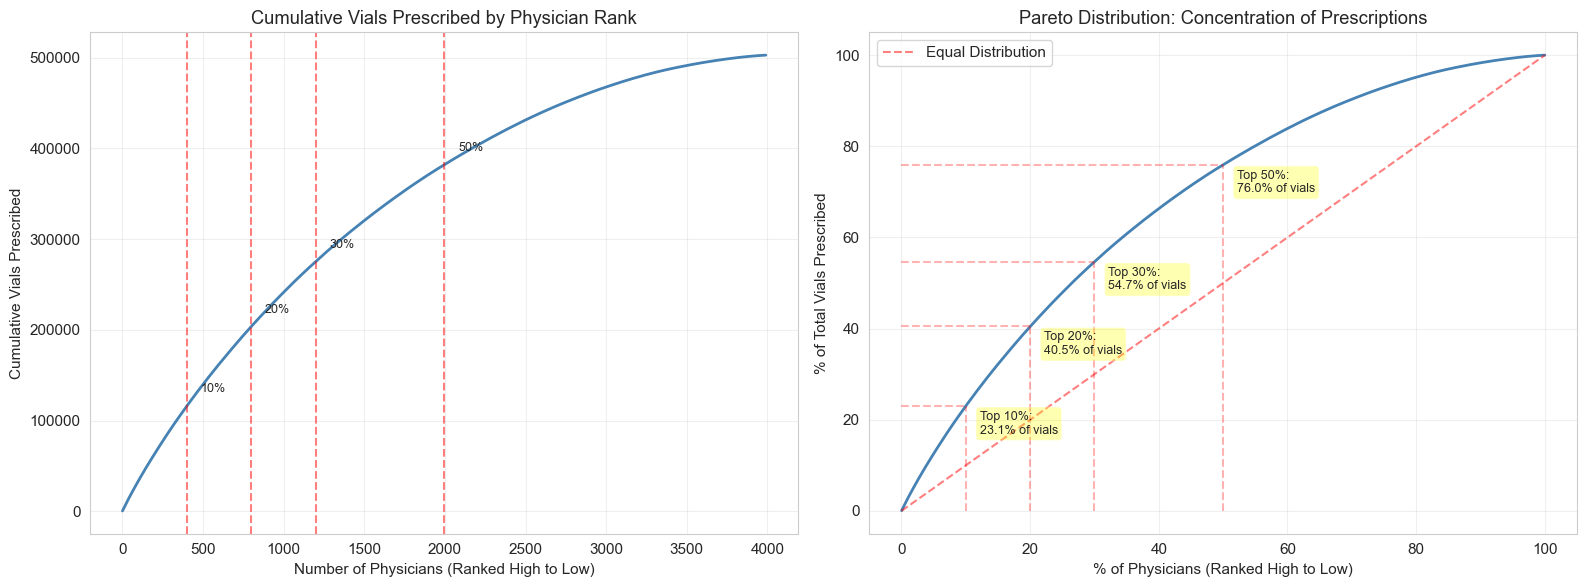


KEY STATISTICS: Concentration of Prescriptions

Top 10% of physicians (400 physicians):
  Prescribe 115,955 vials (23.1% of total)
  Average per physician: 289.9 vials

Top 20% of physicians (799 physicians):
  Prescribe 203,504 vials (40.5% of total)
  Average per physician: 254.7 vials

Top 30% of physicians (1,198 physicians):
  Prescribe 275,025 vials (54.7% of total)
  Average per physician: 229.6 vials

Top 50% of physicians (1,996 physicians):
  Prescribe 381,961 vials (76.0% of total)
  Average per physician: 191.4 vials


In [ ]:
# Cumulative vials prescribed vs number of physicians (sorted high to low)
# Sort by vials prescribed (descending)
df_sorted = df.sort_values('Competitor Vials Prescribed Per Year', ascending=False).reset_index(drop=True)

# Calculate cumulative vials and percentages
df_sorted['cumulative_vials'] = df_sorted['Competitor Vials Prescribed Per Year'].cumsum()
df_sorted['cumulative_pct_vials'] = (df_sorted['cumulative_vials'] / df_sorted['Competitor Vials Prescribed Per Year'].sum()) * 100
df_sorted['physician_rank'] = range(1, len(df_sorted) + 1)
df_sorted['physician_pct'] = (df_sorted['physician_rank'] / len(df_sorted)) * 100

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Cumulative vials vs physician rank
axes[0].plot(df_sorted['physician_rank'], df_sorted['cumulative_vials'], linewidth=2, color='steelblue')
axes[0].set_xlabel('Number of Physicians (Ranked High to Low)')
axes[0].set_ylabel('Cumulative Vials Prescribed')
axes[0].set_title('Cumulative Vials Prescribed by Physician Rank')
axes[0].grid(True, alpha=0.3)

# Add key thresholds (e.g., top 20%, 50%)
for pct in [10, 20, 30, 50]:
    idx = int(len(df_sorted) * pct / 100)
    if idx < len(df_sorted):
        axes[0].axvline(x=idx+1, color='red', linestyle='--', alpha=0.5, label=f'Top {pct}%')
        axes[0].annotate(f'{pct}%', xy=(idx+1, df_sorted.iloc[idx]['cumulative_vials']), 
                        xytext=(10, 10), textcoords='offset points', fontsize=9)

# Right plot: Cumulative percentage of vials vs percentage of physicians (Pareto-style)
axes[1].plot(df_sorted['physician_pct'], df_sorted['cumulative_pct_vials'], linewidth=2, color='steelblue')
axes[1].plot([0, 100], [0, 100], 'r--', alpha=0.5, label='Equal Distribution')
axes[1].set_xlabel('% of Physicians (Ranked High to Low)')
axes[1].set_ylabel('% of Total Vials Prescribed')
axes[1].set_title('Pareto Distribution: Concentration of Prescriptions')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Add key thresholds
for pct in [10, 20, 30, 50]:
    idx = int(len(df_sorted) * pct / 100)
    if idx < len(df_sorted):
        vial_pct = df_sorted.iloc[idx]['cumulative_pct_vials']
        axes[1].plot([pct, pct], [0, vial_pct], 'r--', alpha=0.3)
        axes[1].plot([0, pct], [vial_pct, vial_pct], 'r--', alpha=0.3)
        axes[1].annotate(f'Top {pct}%:\n{vial_pct:.1f}% of vials', 
                        xy=(pct, vial_pct), xytext=(10, -20), 
                        textcoords='offset points', fontsize=9, 
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

# Print key statistics
print("\n" + "="*80)
print("KEY STATISTICS: Concentration of Prescriptions")
print("="*80)
total_vials = df_sorted['Competitor Vials Prescribed Per Year'].sum()
for pct in [10, 20, 30, 50]:
    idx = int(len(df_sorted) * pct / 100)
    if idx < len(df_sorted):
        n_physicians = idx + 1
        cum_vials = df_sorted.iloc[idx]['cumulative_vials']
        cum_pct = df_sorted.iloc[idx]['cumulative_pct_vials']
        print(f"\nTop {pct}% of physicians ({n_physicians:,} physicians):")
        print(f"  Prescribe {cum_vials:,.0f} vials ({cum_pct:.1f}% of total)")
        print(f"  Average per physician: {cum_vials/n_physicians:.1f} vials")


DATA QUALITY DIAGNOSTICS

Total physicians: 3,990
Unique vial values: 166
Duplicate values: 3,824 (95.8% of rows have duplicate vial counts)

Value frequency analysis:
Most common values (showing ties):
Competitor Vials Prescribed Per Year
10    19
11     5
12     9
13    21
14    16
15    15
16    15
17    17
18    14
19    16
20    22
21    17
22    30
23    15
24    31
25    13
26    35
27    17
28    37
29    14
Name: count, dtype: int64

Checking for rounding/binning patterns:
First 20 unique values: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Are values multiples of 10? False
Are values multiples of 5? False


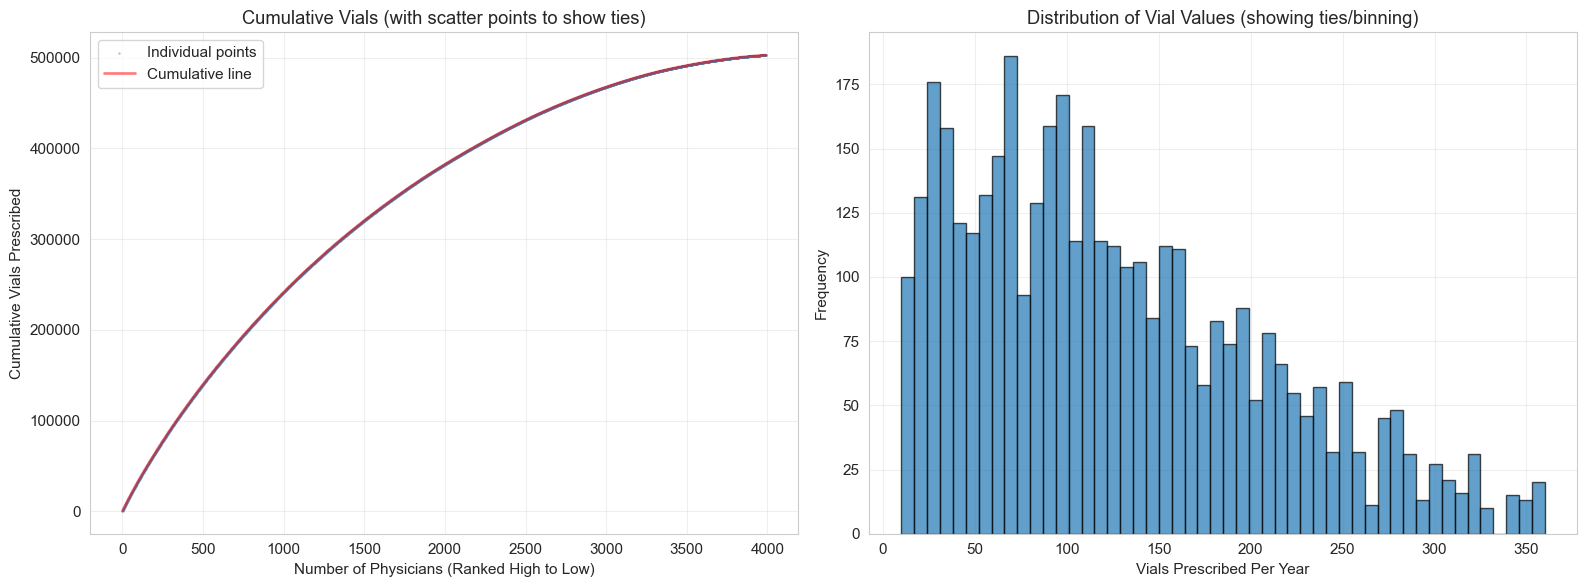


Top 20 physicians by vials prescribed:
           NPI First Name    Last Name  Competitor Vials Prescribed Per Year
0   1003991035      FRANK     FOSSELLA                                   360
1   1730188152       SUZY    MELKONIAN                                   360
2   1073698767  ELIZABETH       POPLIN                                   360
3   1972659266       LEON        HWANG                                   360
4   1912947342     HAROLD         TARA                                   360
5   1902886369     PAMELA   DRULLINSKY                                   360
6   1891805446     ROBERT     GALAMAGA                                   360
7   1790722619  ALEXANDER        STARR                                   360
8   1770800732     ROBERT         DALY                                   360
9   1740422039    MELISSA    ACCORDINO                                   360
10  1740579911  KATHERINE        BEVER                                   360
11  1710076567     PHILIP           

In [14]:
# Data quality check: Why does the curve look "too perfect"?
print("="*80)
print("DATA QUALITY DIAGNOSTICS")
print("="*80)

# Check for duplicate values
total_rows = len(df)
unique_vials = df['Competitor Vials Prescribed Per Year'].nunique()
print(f"\nTotal physicians: {total_rows:,}")
print(f"Unique vial values: {unique_vials:,}")
print(f"Duplicate values: {total_rows - unique_vials:,} ({((total_rows - unique_vials)/total_rows)*100:.1f}% of rows have duplicate vial counts)")

# Check value distribution
print(f"\nValue frequency analysis:")
vial_counts = df['Competitor Vials Prescribed Per Year'].value_counts().sort_index()
print(f"Most common values (showing ties):")
print(vial_counts.head(20))

# Check if values are rounded/binned
print(f"\nChecking for rounding/binning patterns:")
sample_values = sorted(df['Competitor Vials Prescribed Per Year'].unique())[:20]
print(f"First 20 unique values: {sample_values}")
print(f"\nAre values multiples of 10? {all(v % 10 == 0 for v in sample_values)}")
print(f"Are values multiples of 5? {all(v % 5 == 0 for v in sample_values)}")

# Show actual data points on the curve
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Show individual points (scatter) to see if there are ties
axes[0].scatter(df_sorted['physician_rank'], df_sorted['cumulative_vials'], 
               s=1, alpha=0.3, color='steelblue', label='Individual points')
axes[0].plot(df_sorted['physician_rank'], df_sorted['cumulative_vials'], 
             linewidth=2, color='red', alpha=0.5, label='Cumulative line')
axes[0].set_xlabel('Number of Physicians (Ranked High to Low)')
axes[0].set_ylabel('Cumulative Vials Prescribed')
axes[0].set_title('Cumulative Vials (with scatter points to show ties)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right plot: Show the actual distribution of vial values (not cumulative)
axes[1].hist(df_sorted['Competitor Vials Prescribed Per Year'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Vials Prescribed Per Year')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Vial Values (showing ties/binning)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show top and bottom values to check for patterns
print(f"\nTop 20 physicians by vials prescribed:")
print(df_sorted[['NPI', 'First Name', 'Last Name', 'Competitor Vials Prescribed Per Year']].head(20))
print(f"\nBottom 20 physicians by vials prescribed:")
print(df_sorted[['NPI', 'First Name', 'Last Name', 'Competitor Vials Prescribed Per Year']].tail(20))


RELATIONSHIP: Vials Prescribed vs Patients Treated

Pearson Correlation Coefficient: 0.7951

Average Vials by Patient Count Bucket:
                      mean  median        std  count
patient_bucket                                      
1-3              46.273869    39.0  25.411211   1194
4-5             102.845269   100.0  36.560445    782
6-7             149.130711   144.0  52.892348    788
8-10            203.623165   198.0  72.674785   1226


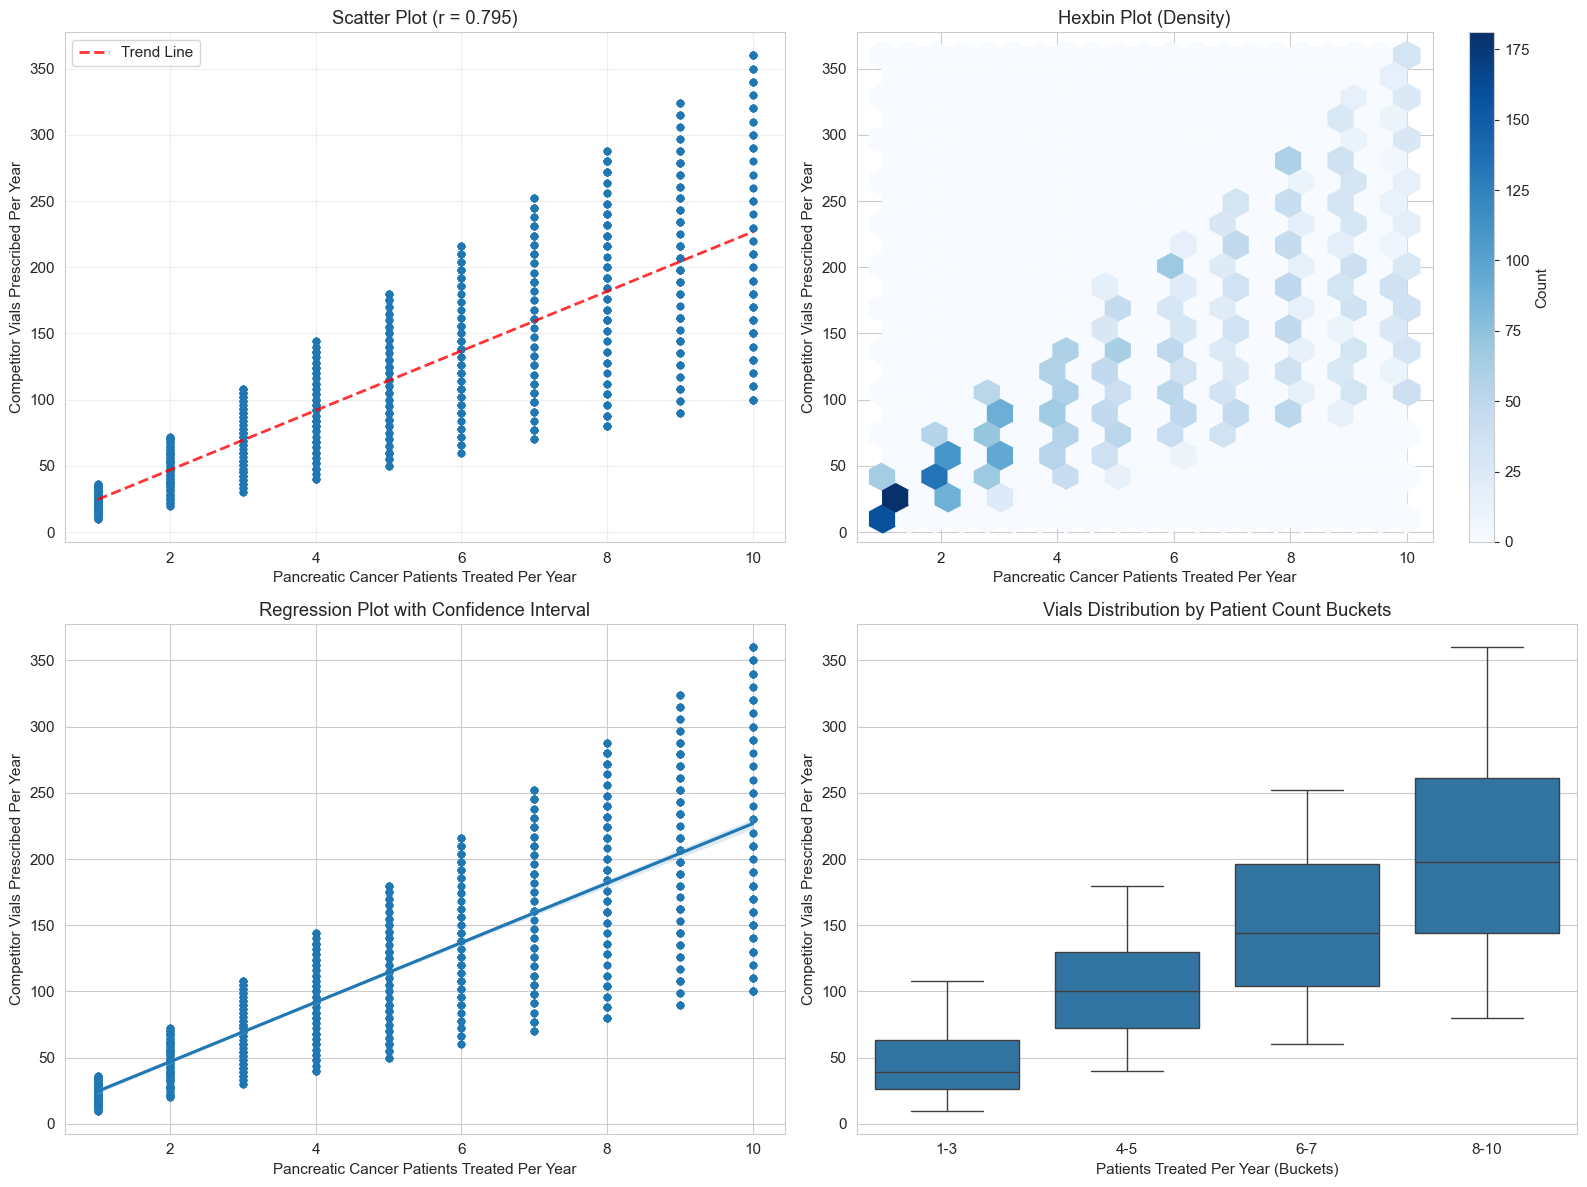


ADDITIONAL STATISTICS

Vials per Patient (average): 22.84
Vials per Patient (median): 23.00

Vials per Patient Statistics:
count    3990.000000
mean       22.937093
std         7.813975
min        10.000000
25%        16.000000
50%        23.000000
75%        30.000000
max        36.000000
Name: vials_per_patient, dtype: float64


In [15]:
# Relationship between Vials Prescribed and Patients Treated
print("="*80)
print("RELATIONSHIP: Vials Prescribed vs Patients Treated")
print("="*80)

# Calculate correlation
correlation = df['Competitor Vials Prescribed Per Year'].corr(df['Pancreatic Cancer Patients Treated Per Year'])
print(f"\nPearson Correlation Coefficient: {correlation:.4f}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top left: Scatter plot
axes[0, 0].scatter(df['Pancreatic Cancer Patients Treated Per Year'], 
                   df['Competitor Vials Prescribed Per Year'], 
                   alpha=0.5, s=20)
axes[0, 0].set_xlabel('Pancreatic Cancer Patients Treated Per Year')
axes[0, 0].set_ylabel('Competitor Vials Prescribed Per Year')
axes[0, 0].set_title(f'Scatter Plot (r = {correlation:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Pancreatic Cancer Patients Treated Per Year'], 
               df['Competitor Vials Prescribed Per Year'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['Pancreatic Cancer Patients Treated Per Year'].sort_values(), 
                p(df['Pancreatic Cancer Patients Treated Per Year'].sort_values()), 
                "r--", alpha=0.8, linewidth=2, label='Trend Line')
axes[0, 0].legend()

# Top right: Hexbin plot (better for high density)
axes[0, 1].hexbin(df['Pancreatic Cancer Patients Treated Per Year'], 
                  df['Competitor Vials Prescribed Per Year'], 
                  gridsize=20, cmap='Blues')
axes[0, 1].set_xlabel('Pancreatic Cancer Patients Treated Per Year')
axes[0, 1].set_ylabel('Competitor Vials Prescribed Per Year')
axes[0, 1].set_title('Hexbin Plot (Density)')
plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1], label='Count')

# Bottom left: Scatter with regression line using seaborn
sns.regplot(data=df, x='Pancreatic Cancer Patients Treated Per Year', 
            y='Competitor Vials Prescribed Per Year', 
            ax=axes[1, 0], scatter_kws={'alpha': 0.5, 's': 20})
axes[1, 0].set_title('Regression Plot with Confidence Interval')

# Bottom right: Grouped analysis by patient count buckets
df['patient_bucket'] = pd.cut(df['Pancreatic Cancer Patients Treated Per Year'], 
                               bins=[0, 3, 5, 7, 10], 
                               labels=['1-3', '4-5', '6-7', '8-10'])
bucket_stats = df.groupby('patient_bucket')['Competitor Vials Prescribed Per Year'].agg(['mean', 'median', 'std', 'count'])
print(f"\nAverage Vials by Patient Count Bucket:")
print(bucket_stats)

# Box plot by patient buckets
df_clean = df.dropna(subset=['patient_bucket'])
sns.boxplot(data=df_clean, x='patient_bucket', y='Competitor Vials Prescribed Per Year', ax=axes[1, 1])
axes[1, 1].set_xlabel('Patients Treated Per Year (Buckets)')
axes[1, 1].set_ylabel('Competitor Vials Prescribed Per Year')
axes[1, 1].set_title('Vials Distribution by Patient Count Buckets')

plt.tight_layout()
plt.show()

# Additional statistics
print(f"\n" + "="*80)
print("ADDITIONAL STATISTICS")
print("="*80)
print(f"\nVials per Patient (average): {df['Competitor Vials Prescribed Per Year'].sum() / df['Pancreatic Cancer Patients Treated Per Year'].sum():.2f}")
print(f"Vials per Patient (median): {(df['Competitor Vials Prescribed Per Year'] / df['Pancreatic Cancer Patients Treated Per Year']).median():.2f}")

# Calculate vials per patient for each physician
df['vials_per_patient'] = df['Competitor Vials Prescribed Per Year'] / df['Pancreatic Cancer Patients Treated Per Year']
print(f"\nVials per Patient Statistics:")
print(df['vials_per_patient'].describe())


In [16]:
# Doctors and vials by state
state_summary = df.groupby('Organization State').agg({
    'NPI': 'count',
    'Competitor Vials Prescribed Per Year': ['mean', 'sum']
}).round(1)
state_summary.columns = ['Doctors', 'Avg Vials', 'Total Vials']
state_summary = state_summary.sort_values('Total Vials', ascending=False)

print(state_summary)
print(f"\nGrand Total: {len(df):,} doctors, {df['Competitor Vials Prescribed Per Year'].sum():,.0f} total vials")


                    Doctors  Avg Vials  Total Vials
Organization State                                 
NY                      485      121.6        58958
TX                      399      123.8        49412
CA                      307      124.4        38194
MA                      205      126.0        25840
FL                      189      123.7        23386
PA                      176      114.7        20181
MD                      125      145.0        18119
NC                      116      140.6        16311
MI                      103      141.0        14520
WA                      111      125.1        13888
OH                      107      125.8        13462
IL                       91      132.1        12022
MN                       94      125.4        11786
NJ                       82      140.4        11515
MO                       91      125.3        11400
AZ                       64      132.9         8507
CO                       69      120.2         8293
CT          

In [ ]:
# Top 50% doctors by vials prescribed: state and patient breakdown
top50 = df.nlargest(int(len(df) * 0.5), 'Competitor Vials Prescribed Per Year')

print("State Breakdown:")
print(top50['Organization State'].value_counts().sort_values(ascending=False))

print("\n\nPatient Count Breakdown:")
print(top50['Pancreatic Cancer Patients Treated Per Year'].value_counts().sort_index())


State Breakdown:
Organization State
NY    213
TX    202
CA    146
MA    107
FL     98
PA     80
MD     70
NC     68
WA     59
OH     58
MI     55
MN     52
MO     50
IL     47
NJ     45
AZ     33
CO     31
GA     30
AL     27
TN     27
VA     25
CT     24
WI     24
IA     24
OR     23
UT     21
IN     21
OK     20
NE     18
ID     14
MS     12
KY     12
KS     12
SC     11
NM     11
NH      9
LA      9
NV      8
ME      6
MT      6
AK      6
DC      6
WV      4
DE      3
AR      3
HI      3
ND      2
RI      2
VT      1
PR      1
SD      1
Name: count, dtype: int64


Patient Count Breakdown:
Pancreatic Cancer Patients Treated Per Year
3       4
4     134
5     212
6     262
7     291
8     352
9     382
10    358
Name: count, dtype: int64
